In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

matplotlib.rcParams["font.family"] = "Open Sans"
matplotlib.rcParams["font.size"] = 12
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams["axes.spines.bottom"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.spines.left"] = False
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["xtick.major.size"] = 0
matplotlib.rcParams["ytick.major.size"] = 0


In [58]:
print(matplotlib.rcParams.keys())

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [31]:
# read input
fname = "top500-time.dat"
with open(fname) as stream:
    lines = stream.readlines()

# initialize containers
rows = []
row = []

for i in range(len(lines)):
    line = lines[i]
    if len(line.strip()) == 0:
        rows.append(row)
        row = []
    # skip lines other than starting new row
    if line[0] != "[":
        continue

    # get date
    year = int(line[13:17])
    month = int(line.split(",")[1])
    day = int(line.split(",")[2][:-1])
    date = datetime.date(year=year, month=month, day=day)
    row.append(date)
    
    # get data of the date
    data_sum = float(lines[i+1].strip()[:-1])
    row.append(data_sum)
    data_first = float(lines[i+3].strip()[:-1])
    row.append(data_first)
    data_500th = float(lines[i+5].strip()[:-1])
    row.append(data_500th)
        
            

In [32]:
df = pd.DataFrame(rows, columns="date sum first 500th".split())

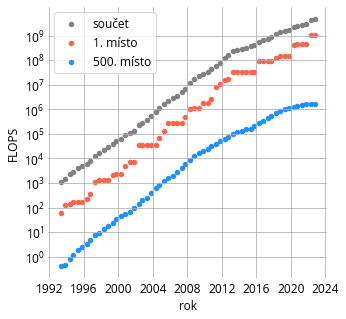

In [70]:
fig, ax = plt.subplots(figsize=(5,5))
df.plot.scatter(x="date", y="sum", ax=ax, c="gray", fig=fig, logy=True, label="součet")
df.plot.scatter(x="date", y="first", ax=ax, c="tomato", label="1. místo")
df.plot.scatter(x="date", y="500th", ax=ax, c="dodgerblue", label="500. místo")

ax.set_xlabel("rok")
ax.set_ylabel("FLOPS")
ax.set_yticks((1,10,100,1000,1e4,1e5,1e6,1e7,1e8,1e9))
"done"

plt.savefig("top500-time.pdf")